/var/folders/kr/f58f4vdx13g_lwx179mtw12c0000gn/T/ipykernel_8300/1728749377.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


Ticker
AAPL    0.034013
KO      0.078930
TSLA    0.574302
dtype: float64
Ticker      AAPL        KO      TSLA
Ticker                              
AAPL    0.101020  0.008503  0.112728
KO      0.008503  0.029477 -0.010649
TSLA    0.112728 -0.010649  0.532797


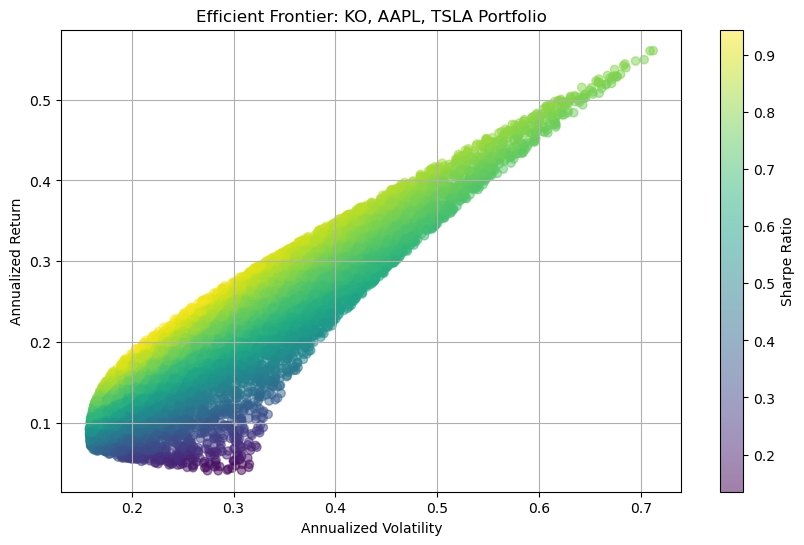

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the assets and date range
assets = ['KO', 'AAPL', 'TSLA']
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365)

# Download historical price data
data = yf.download(assets, start=start_date, end=end_date)['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Compute annualized mean returns and covariance matrix
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

print(mean_returns)
print(cov_matrix)

# Monte Carlo simulation for portfolio allocation
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Create a DataFrame of results
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe Ratio"])

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier: KO, AAPL, TSLA Portfolio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.grid(True)
plt.show()

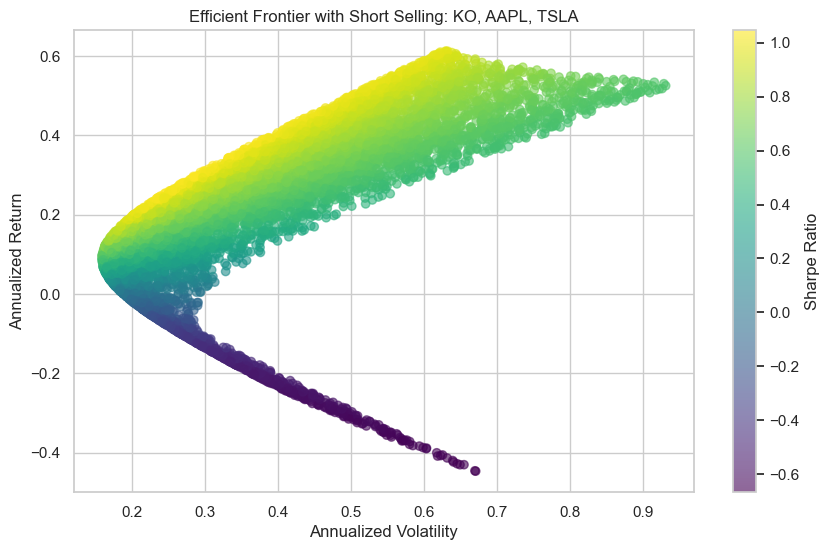

In [66]:
# Monte Carlo simulation with short selling allowed
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []


for i in range(num_portfolios):
    while True:
        # Generate initial random weights for each asset in the range [-1, 1]
        weights = np.random.uniform(-1, 1, len(assets))

        # Normalize the weights so that their sum equals 1
        weights /= np.sum(weights)

        # Ensure that each weight remains within the range [-1, 1]
        # (Normalization may push some weights outside this range)
        if np.all(weights >= -1) and np.all(weights <= 1):
            break  # Valid weights found; exit the loop. Otherwise, resample.
    
    # Portfolio statistics
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = port_return / port_volatility

    # Store results
    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio
    weights_record.append(weights)

# Create results DataFrame
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe Ratio"])
weights_df = pd.DataFrame(weights_record, columns=assets)

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier with Short Selling: KO, AAPL, TSLA')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.grid(True)
plt.show()